In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpldatacursor import datacursor
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('corona_north_macedonia.csv')

In [3]:
df.tail(1)

,datum,novi_pozitivni,vkupno_novi,izleceni,vkupno_izleceni,pocinati,vkupno_pocinati,active
37,2020-04-03,46,430,3,20,1,12,398


In [4]:
x_data = np.array(list(range(len(df))))
y_data = np.array(df['vkupno_novi'])
x = np.linspace(1,len(df),len(df))


In [5]:
kvadratni = np.polyfit(x_data,y_data, 2)

In [6]:
y = kvadratni[0]*(x_data**2) + kvadratni[1]*x_data + kvadratni[2]

In [7]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c

In [8]:
def func_1(x, b):
    return np.exp(b * x)

In [9]:
popt, pcov = curve_fit(func, x_data, y_data)

In [10]:
popt1, pcov1 = curve_fit(func_1, x_data, y_data)

In [11]:
y_exp = func(x_data, *popt)

In [12]:
y_exp_1 = func_1(x_data, *popt1)

In [13]:
y_exp_original = np.exp(0.2*x_data)

In [14]:
testirani = 2240 + 406 + 480 + 392 + 257 + 342

In [15]:
R2 = r2_score(y_data, y_exp)
R2

0.9886117947382173

In [16]:
R2_1 = r2_score(y_data, y_exp_1)
R2_1

0.9390703562722258

In [17]:
R2_original = r2_score(y_exp_original,y_data)
R2_original

0.3810247653910702

In [18]:
parametri = []
parametri.append(popt[0])
parametri.append(popt[1])
parametri.append(popt[2])
parametri.append(R2)
parametri = np.array(parametri)
parametri

array([  9.11268616,   0.10658469, -23.45877789,   0.98861179])

In [19]:
parametri1 = []
parametri1.append(popt1[0])
parametri1.append(R2_1)
parametri1 = np.array(parametri1)
parametri1

array([0.16834978, 0.93907036])

In [20]:
parametri_original = []
parametri_original.append(0.20)
parametri_original.append(R2_original)
parametri_original = np.array(parametri_original)
parametri_original

array([0.2       , 0.38102477])

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 <a list of 7 Text major ticklabel objects>)

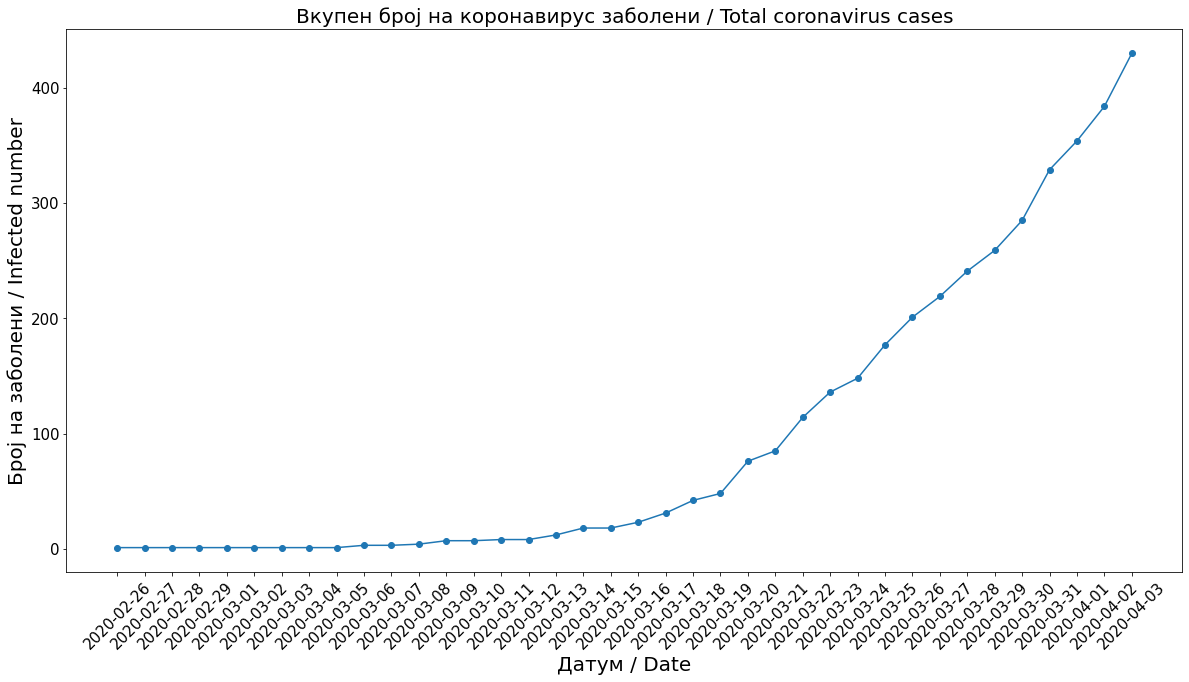

In [21]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['vkupno_novi'], '-o')
plt.title("Вкупен број на коронавирус заболени / Total coronavirus cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Број на заболени / Infected number", fontsize=20)
plt.xticks(rotation = '45', fontsize=15)
plt.yticks(fontsize=15)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

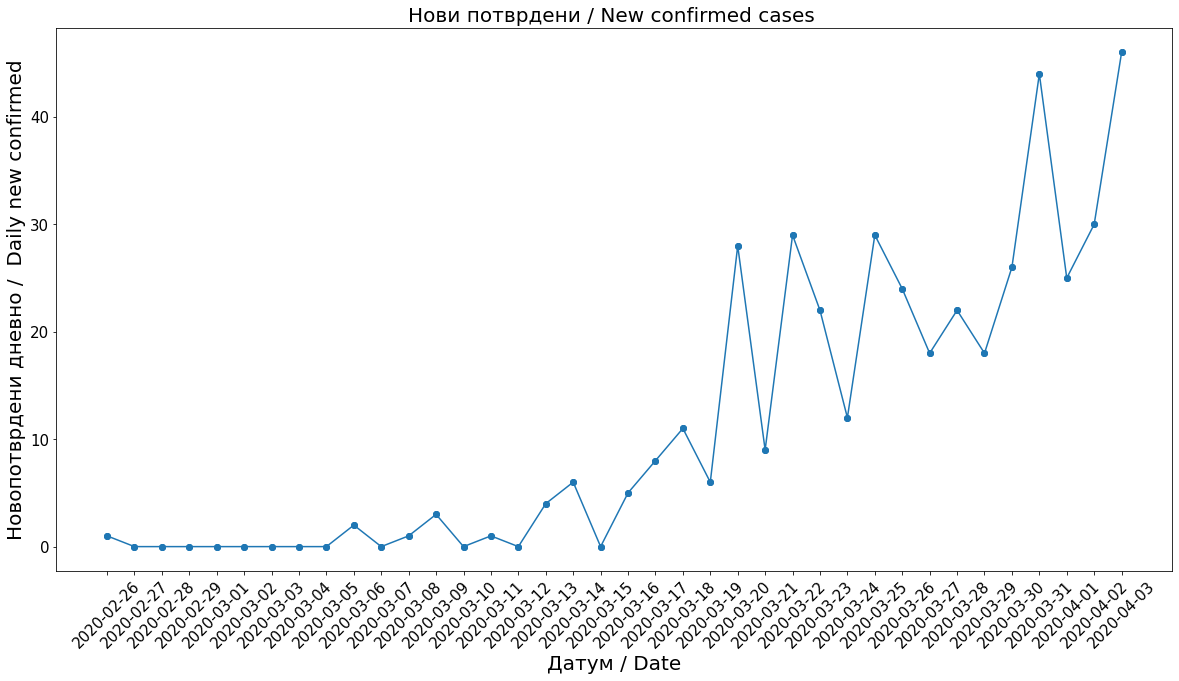

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['novi_pozitivni'], '-o')
plt.scatter(df['datum'],df['novi_pozitivni'])
plt.title("Нови потврдени / New confirmed cases ", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Новопотврдени дневно /  Daily new confirmed", fontsize=20)
plt.xticks(fontsize=15, rotation = '45')
plt.yticks(fontsize=15)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

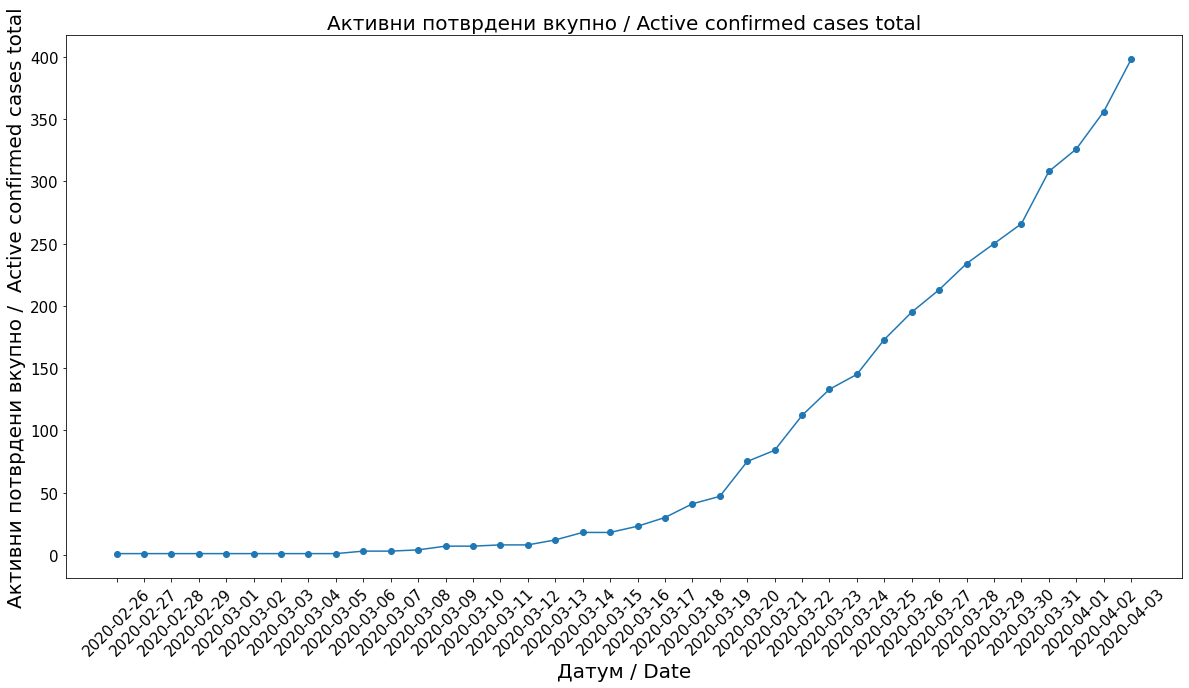

In [23]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['active'], '-o')
plt.title("Активни потврдени вкупно / Active confirmed cases total", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Активни потврдени вкупно /  Active confirmed cases total", fontsize=20)
plt.xticks(fontsize=15, rotation = '45')
plt.yticks(fontsize=15)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 8 Text major ticklabel objects>)

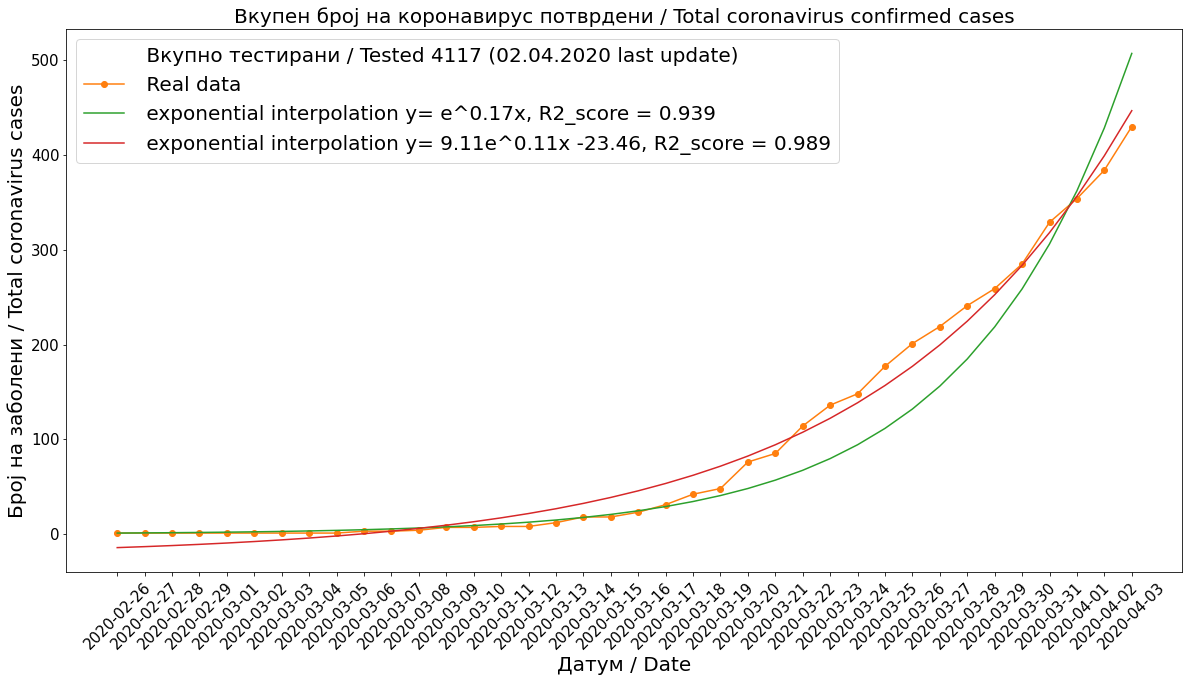

In [24]:
plt.figure(figsize=(20,10))
plt.plot([], [], ' ', label=" Вкупно тестирани / Tested %d (02.04.2020 last update)" %testirani)
plt.plot(df['datum'],df['vkupno_novi'],'-o', label = ' Real data')
#plt.plot(df['datum'],y, label = ' polinomial interpolation y= %2.2fx^2 %2.2fx %+2.2f' % tuple(kvadratni))
plt.plot(df['datum'], y_exp_1, label = ' exponential interpolation y= e^%2.2fx, R2_score = %2.3f ' % tuple(parametri1))
plt.plot(df['datum'], y_exp, label = ' exponential interpolation y= %2.2fe^%2.2fx %+2.2f, R2_score = %2.3f' % tuple(parametri))
plt.legend(fontsize=20)
plt.title("Вкупен број на коронавирус потврдени / Total coronavirus confirmed cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Број на заболени / Total coronavirus cases", fontsize=20)
plt.xticks(fontsize=15, rotation = '45')
plt.yticks(fontsize=15)


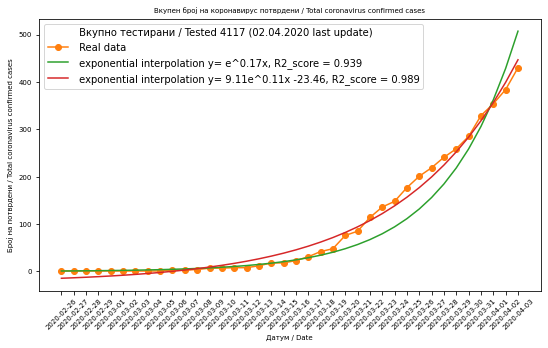

In [25]:
#%matplotlib notebook
### INTERACTIVE
plt.figure(figsize=(9,5))
plt.plot([], [], ' ', label=" Вкупно тестирани / Tested %d (02.04.2020 last update)" %testirani)
plt.plot(df['datum'],df['vkupno_novi'],'-o', label = ' Real data')
#plt.plot(df['datum'],y, label = ' polinomial interpolation y= %2.2fx^2 %2.2fx %+2.2f' % tuple(kvadratni))
plt.plot(df['datum'], y_exp_1, label = ' exponential interpolation y= e^%2.2fx, R2_score = %2.3f ' % tuple(parametri1))
plt.plot(df['datum'], y_exp, label = ' exponential interpolation y= %2.2fe^%2.2fx %+2.2f, R2_score = %2.3f' % tuple(parametri))
plt.legend(fontsize=10)
plt.title("Вкупен број на коронавирус потврдени / Total coronavirus confirmed cases", fontsize=7)
plt.xlabel("Датум / Date", fontsize=7)
plt.ylabel("Број на потврдени / Total coronavirus confirmed cases", fontsize=7)
plt.xticks(fontsize=7, rotation = '45')
plt.yticks(fontsize=7)
datacursor(hover=True)


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]), <a list of 11 Text major ticklabel objects>)

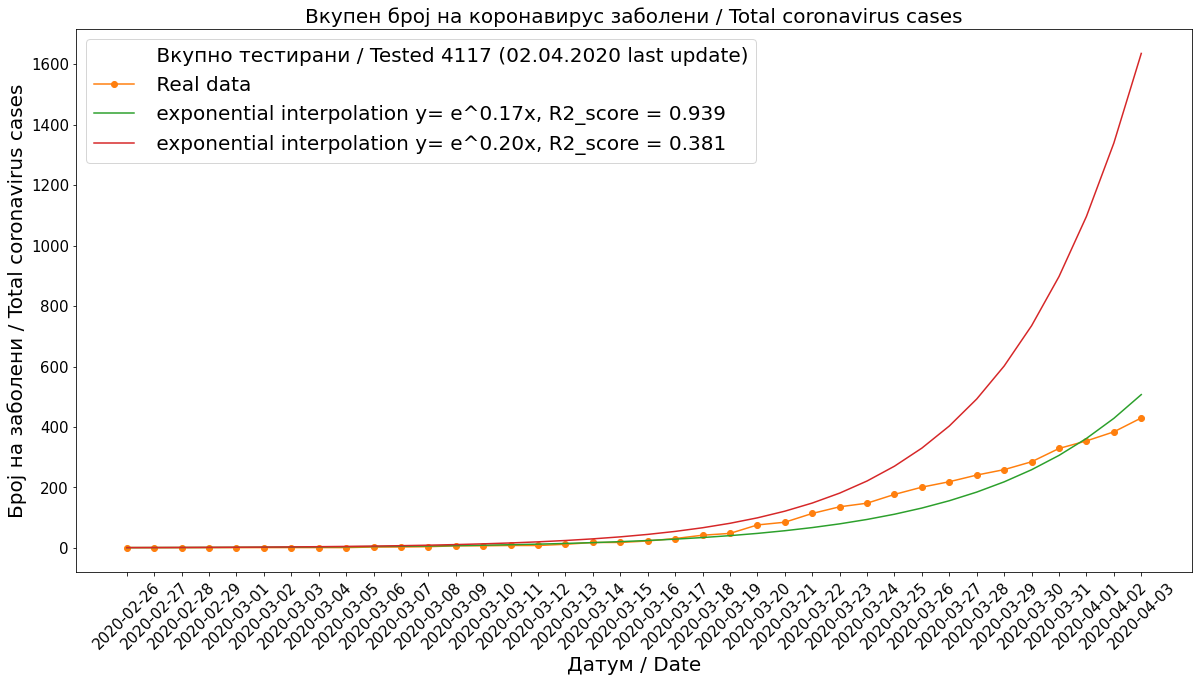

In [26]:
plt.figure(figsize=(20,10))
plt.plot([], [], ' ', label=" Вкупно тестирани / Tested %d (02.04.2020 last update)" %testirani)
plt.plot(df['datum'],df['vkupno_novi'],'-o', label = ' Real data')
#plt.plot(df['datum'],y, label = ' polinomial interpolation y= %2.2fx^2 %2.2fx %+2.2f' % tuple(kvadratni))
plt.plot(df['datum'], y_exp_1, label = ' exponential interpolation y= e^%2.2fx, R2_score = %2.3f ' % tuple(parametri1))
plt.plot(df['datum'], y_exp_original, label = ' exponential interpolation y= e^%2.2fx, R2_score = %2.3f' % tuple(parametri_original))
plt.legend(fontsize=20)
plt.title("Вкупен број на коронавирус заболени / Total coronavirus cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Број на заболени / Total coronavirus cases", fontsize=20)
plt.xticks(fontsize=15, rotation = '45')
plt.yticks(fontsize=15)
